epoch:0, train acc:0.12, test acc:0.0998
epoch:1, train acc:0.143333333333, test acc:0.1093
epoch:2, train acc:0.18, test acc:0.1277
epoch:3, train acc:0.2, test acc:0.1344
epoch:4, train acc:0.21, test acc:0.1426
epoch:5, train acc:0.223333333333, test acc:0.1544
epoch:6, train acc:0.25, test acc:0.1626
epoch:7, train acc:0.256666666667, test acc:0.1691
epoch:8, train acc:0.293333333333, test acc:0.1833
epoch:9, train acc:0.306666666667, test acc:0.1918
epoch:10, train acc:0.343333333333, test acc:0.2134
epoch:11, train acc:0.34, test acc:0.2156
epoch:12, train acc:0.366666666667, test acc:0.2282
epoch:13, train acc:0.376666666667, test acc:0.2364
epoch:14, train acc:0.39, test acc:0.2475
epoch:15, train acc:0.39, test acc:0.259
epoch:16, train acc:0.406666666667, test acc:0.2663
epoch:17, train acc:0.423333333333, test acc:0.2761
epoch:18, train acc:0.443333333333, test acc:0.289
epoch:19, train acc:0.453333333333, test acc:0.2942
epoch:20, train acc:0.47, test acc:0.3145
epoch:21, t

epoch:167, train acc:0.86, test acc:0.659
epoch:168, train acc:0.87, test acc:0.6603
epoch:169, train acc:0.873333333333, test acc:0.6611
epoch:170, train acc:0.866666666667, test acc:0.6607
epoch:171, train acc:0.87, test acc:0.6604
epoch:172, train acc:0.863333333333, test acc:0.6731
epoch:173, train acc:0.853333333333, test acc:0.6718
epoch:174, train acc:0.873333333333, test acc:0.6655
epoch:175, train acc:0.866666666667, test acc:0.6693
epoch:176, train acc:0.873333333333, test acc:0.6625
epoch:177, train acc:0.87, test acc:0.6609
epoch:178, train acc:0.87, test acc:0.661
epoch:179, train acc:0.88, test acc:0.6727
epoch:180, train acc:0.86, test acc:0.662
epoch:181, train acc:0.883333333333, test acc:0.6656
epoch:182, train acc:0.88, test acc:0.6674
epoch:183, train acc:0.876666666667, test acc:0.6673
epoch:184, train acc:0.876666666667, test acc:0.6646
epoch:185, train acc:0.87, test acc:0.6515
epoch:186, train acc:0.866666666667, test acc:0.6606
epoch:187, train acc:0.8733333333

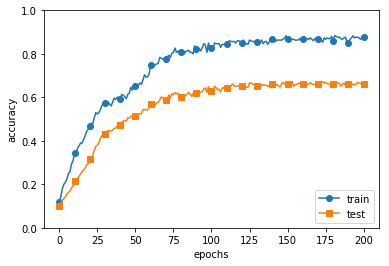

In [1]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.0966666666667, test acc:0.0902
epoch:1, train acc:0.09, test acc:0.0925
epoch:2, train acc:0.0966666666667, test acc:0.1021
epoch:3, train acc:0.12, test acc:0.1144
epoch:4, train acc:0.14, test acc:0.1298
epoch:5, train acc:0.183333333333, test acc:0.1517
epoch:6, train acc:0.206666666667, test acc:0.1768
epoch:7, train acc:0.236666666667, test acc:0.2012
epoch:8, train acc:0.26, test acc:0.2188
epoch:9, train acc:0.286666666667, test acc:0.2351
epoch:10, train acc:0.293333333333, test acc:0.2516
epoch:11, train acc:0.323333333333, test acc:0.2617
epoch:12, train acc:0.333333333333, test acc:0.2723
epoch:13, train acc:0.356666666667, test acc:0.2861
epoch:14, train acc:0.386666666667, test acc:0.2998
epoch:15, train acc:0.396666666667, test acc:0.3097
epoch:16, train acc:0.42, test acc:0.3189
epoch:17, train acc:0.42, test acc:0.3311
epoch:18, train acc:0.433333333333, test acc:0.3399
epoch:19, train acc:0.45, test acc:0.3543
epoch:20, train acc:0.463333333333, te

epoch:167, train acc:0.85, test acc:0.7084
epoch:168, train acc:0.85, test acc:0.699
epoch:169, train acc:0.853333333333, test acc:0.7032
epoch:170, train acc:0.853333333333, test acc:0.7051
epoch:171, train acc:0.846666666667, test acc:0.7045
epoch:172, train acc:0.846666666667, test acc:0.7069
epoch:173, train acc:0.843333333333, test acc:0.7049
epoch:174, train acc:0.86, test acc:0.7046
epoch:175, train acc:0.853333333333, test acc:0.7116
epoch:176, train acc:0.85, test acc:0.7092
epoch:177, train acc:0.843333333333, test acc:0.702
epoch:178, train acc:0.843333333333, test acc:0.6942
epoch:179, train acc:0.846666666667, test acc:0.6977
epoch:180, train acc:0.853333333333, test acc:0.7015
epoch:181, train acc:0.853333333333, test acc:0.699
epoch:182, train acc:0.85, test acc:0.7031
epoch:183, train acc:0.853333333333, test acc:0.7096
epoch:184, train acc:0.846666666667, test acc:0.7057
epoch:185, train acc:0.85, test acc:0.7096
epoch:186, train acc:0.85, test acc:0.7012
epoch:187, tr

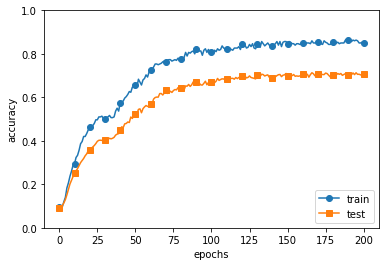

In [2]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.30265020076
=== epoch:1, train acc:0.0633333333333, test acc:0.0844 ===
train loss:2.30974034664
train loss:2.30871770064
train loss:2.31132613862
=== epoch:2, train acc:0.0633333333333, test acc:0.0836 ===
train loss:2.31363457446
train loss:2.30081147324
train loss:2.30672381903
=== epoch:3, train acc:0.0633333333333, test acc:0.0839 ===
train loss:2.31110683574
train loss:2.30542026425
train loss:2.30678888165
=== epoch:4, train acc:0.06, test acc:0.0852 ===
train loss:2.31091670847
train loss:2.30468174922
train loss:2.31272601228
=== epoch:5, train acc:0.06, test acc:0.0857 ===
train loss:2.30574991057
train loss:2.3072468793
train loss:2.30667352066
=== epoch:6, train acc:0.0633333333333, test acc:0.0887 ===
train loss:2.30184989171
train loss:2.29785941215
train loss:2.30304051983
=== epoch:7, train acc:0.0533333333333, test acc:0.0908 ===
train loss:2.31097439436
train loss:2.30714709986
train loss:2.30582607465
=== epoch:8, train acc:0.0566666666667, test acc:0.09

=== epoch:64, train acc:0.25, test acc:0.2268 ===
train loss:2.22288646512
train loss:2.23395700749
train loss:2.21799178239
=== epoch:65, train acc:0.253333333333, test acc:0.2264 ===
train loss:2.24435166214
train loss:2.22881063452
train loss:2.24771502373
=== epoch:66, train acc:0.26, test acc:0.2315 ===
train loss:2.22357099914
train loss:2.22943612291
train loss:2.23814052551
=== epoch:67, train acc:0.26, test acc:0.2335 ===
train loss:2.18806443696
train loss:2.18938480843
train loss:2.23088961314
=== epoch:68, train acc:0.253333333333, test acc:0.2327 ===
train loss:2.23536497235
train loss:2.21234946688
train loss:2.24029111122
=== epoch:69, train acc:0.256666666667, test acc:0.2326 ===
train loss:2.22823793939
train loss:2.25431637274
train loss:2.22340861975
=== epoch:70, train acc:0.26, test acc:0.2334 ===
train loss:2.23402002596
train loss:2.21831161879
train loss:2.23120233035
=== epoch:71, train acc:0.256666666667, test acc:0.2329 ===
train loss:2.22903994458
train loss

=== epoch:127, train acc:0.316666666667, test acc:0.265 ===
train loss:2.0337851916
train loss:2.04557569002
train loss:2.09365540541
=== epoch:128, train acc:0.316666666667, test acc:0.2652 ===
train loss:2.0286519579
train loss:2.0473959889
train loss:2.09138302656
=== epoch:129, train acc:0.32, test acc:0.2647 ===
train loss:2.02915867943
train loss:1.89677071631
train loss:1.98690391337
=== epoch:130, train acc:0.316666666667, test acc:0.261 ===
train loss:2.07234448238
train loss:2.05231875877
train loss:2.05236977285
=== epoch:131, train acc:0.316666666667, test acc:0.2632 ===
train loss:2.10223906571
train loss:2.1046906643
train loss:2.01323235349
=== epoch:132, train acc:0.32, test acc:0.2672 ===
train loss:2.0549740132
train loss:2.00890678601
train loss:2.01654505474
=== epoch:133, train acc:0.326666666667, test acc:0.27 ===
train loss:1.98356098639
train loss:2.10073668063
train loss:2.05355934991
=== epoch:134, train acc:0.323333333333, test acc:0.2705 ===
train loss:2.056

=== epoch:189, train acc:0.46, test acc:0.3787 ===
train loss:1.91501722381
train loss:1.76836180123
train loss:1.803704267
=== epoch:190, train acc:0.473333333333, test acc:0.3806 ===
train loss:1.86062687801
train loss:1.86553443791
train loss:1.69857293681
=== epoch:191, train acc:0.466666666667, test acc:0.377 ===
train loss:1.96540467419
train loss:1.89800499873
train loss:1.82201151039
=== epoch:192, train acc:0.463333333333, test acc:0.3734 ===
train loss:1.81407569401
train loss:1.85699182688
train loss:1.88307140966
=== epoch:193, train acc:0.46, test acc:0.3701 ===
train loss:1.90754758025
train loss:1.83687998271
train loss:1.82102953442
=== epoch:194, train acc:0.46, test acc:0.3674 ===
train loss:1.88565653032
train loss:1.81996621113
train loss:1.93871553147
=== epoch:195, train acc:0.45, test acc:0.365 ===
train loss:1.87909825193
train loss:1.90633802528
train loss:1.89097526553
=== epoch:196, train acc:0.463333333333, test acc:0.3736 ===
train loss:1.93732997848
train 

=== epoch:252, train acc:0.506666666667, test acc:0.4238 ===
train loss:1.66807349258
train loss:1.59207134809
train loss:1.51995170435
=== epoch:253, train acc:0.5, test acc:0.4259 ===
train loss:1.70392370025
train loss:1.70567256459
train loss:1.71757880994
=== epoch:254, train acc:0.513333333333, test acc:0.4271 ===
train loss:1.52271497735
train loss:1.61645076203
train loss:1.53941565111
=== epoch:255, train acc:0.516666666667, test acc:0.4297 ===
train loss:1.63629314464
train loss:1.73567137534
train loss:1.53382813963
=== epoch:256, train acc:0.52, test acc:0.4314 ===
train loss:1.73793579263
train loss:1.57593686194
train loss:1.53317827006
=== epoch:257, train acc:0.516666666667, test acc:0.4316 ===
train loss:1.67766065434
train loss:1.60150423302
train loss:1.6358519765
=== epoch:258, train acc:0.51, test acc:0.4287 ===
train loss:1.68660385411
train loss:1.72057285934
train loss:1.5986544628
=== epoch:259, train acc:0.516666666667, test acc:0.4308 ===
train loss:1.6302519